<a href="https://colab.research.google.com/github/ravigupta0210/covid19/blob/main/Covid19_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [ ]:
# CLONING THE DATASET FROM THE GITHUB REPOSITORY
!git clone https://github.com/RishitToteja/Chext-X-ray-Images-Data-Set.git

Cloning into 'Chext-X-ray-Images-Data-Set'...
remote: Enumerating objects: 2319, done.
remote: Total 2319 (delta 0), reused 0 (delta 0), pack-reused 2319
Receiving objects: 100% (2319/2319), 1.31 GiB | 39.13 MiB/s, done.
Checking out files: 100% (2296/2296), done.


In [ ]:
import os

main_dir = "/content/Chext-X-ray-Images-Data-Set/DataSet/Data"

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")

#SETING DIRECTORY FOR COVID AND NORMAL IMAGES DIRECTORY
train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")

test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")

In [ ]:
# MAKING SEPERATE FILES :
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

['/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(536).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(118).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(538).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(236).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID-19 (3).jpeg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(235).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(326).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(556).jpg']
['/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(1527).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(662).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(1480).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(1343).

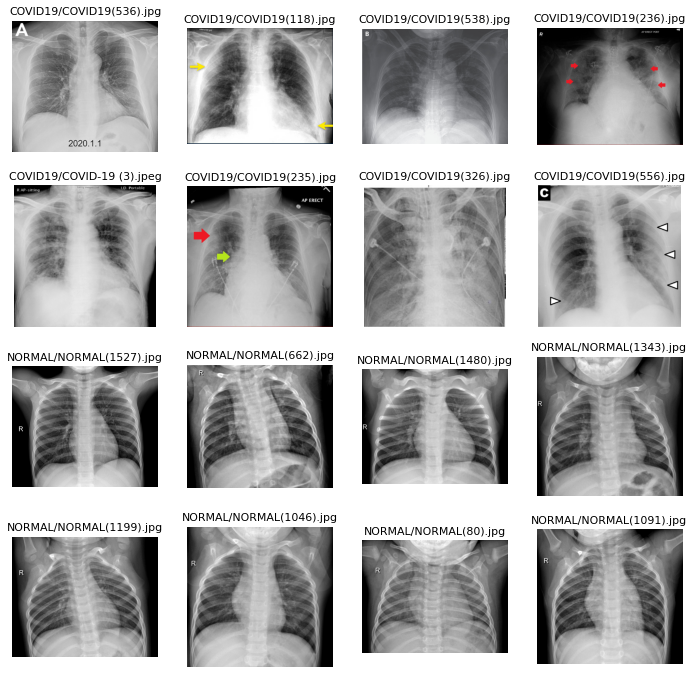

In [ ]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

merged_img = covid_img + normal_img

for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 6)[6]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")

plt.show()

In [ ]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.15,
                                rotation_range = 30,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.15,
                                horizontal_flip = True
)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (256, 256),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 shuffle = True)
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (256, 256),
                                                      subset = "validation",
                                                      batch_size = 32,
                                                      class_mode = "binary",
                                                      shuffle = False)
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (256, 256),
                                               batch_size = 32,
                                               class_mode = "binary")

#Greetings! Thank you for asking such an amazing question! According to research
#performed at Lund University by Olivier Rukundo on effects of image size on
#deep learning performance via semantic segmentation of magnetic resonance heart
#images with Unet, the optimal image size is 256x256. It seems that many of the
#respondents to your question in this blog also recommended 256x256. Therefore,
#based on research and the recommendation by respondents to this blog, the
#optimal size is 256x256. It is my sincere hope that my response is beneficial
#to you.


# Using inputs of different sizes may have a negative impact on loss/accuracy,
#although smaller input images will almost certainly decrease computational time
#and memory footprint since the feature maps will be smaller.


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)
CLASSES = ['COVID19', 'NORMAL']

Class Labels are:  {'COVID19': 0, 'NORMAL': 1}
Image shape is :  (256, 256, 3)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -1
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 6) CONVOLUTIONAL LAYER - 3
model.add(Conv2D(128, (5,5), padding = "same", activation = "relu"))

# 7) CONVOLUTIONAL LAYER - 4
model.add(Conv2D(256, (5,5), padding = "same", activation = "relu"))

# 8) POOLING LAYER - 4
model.add(MaxPooling2D(pool_size=(2,2)))

# 9) DROPOUT LAYER - 4
model.add(Dropout(0.5))

# 10) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 11) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 12) DROPOUT LAYER -
model.add(Dropout(0.5))

# 13) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_163 (Conv2D)         (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d_147 (MaxPooli  (None, 128, 128, 32)     0         
 ng2D)                                                           
                                                                 
 dropout_179 (Dropout)       (None, 128, 128, 32)      0         
                                                                 
 conv2d_164 (Conv2D)         (None, 128, 128, 64)      51264     
                                                                 
 max_pooling2d_148 (MaxPooli  (None, 64, 64, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_180 (Dropout)       (None, 64, 64, 64)      

In [ ]:
# COMPILING THE MODEL

model.compile(Adam(learning_rate = 0.00146), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# TRAINING THE MODEL
history = model.fit(train_generator,
                    steps_per_epoch = 32,
                    epochs = 16,
                    validation_data = validation_generator,
                    validation_steps = 2)

Epoch 1/16
32/32 [==============================] - 37s 1s/step - loss: 0.2078 - accuracy: 0.9281 - val_loss: 0.1397 - val_accuracy: 0.9688
Epoch 2/16
32/32 [==============================] - 35s 1s/step - loss: 0.1895 - accuracy: 0.9241 - val_loss: 0.2129 - val_accuracy: 0.9219
Epoch 3/16
32/32 [==============================] - 37s 1s/step - loss: 0.1975 - accuracy: 0.9431 - val_loss: 0.1677 - val_accuracy: 0.9062
Epoch 4/16
32/32 [==============================] - 36s 1s/step - loss: 0.2160 - accuracy: 0.9251 - val_loss: 0.2388 - val_accuracy: 0.8906
Epoch 5/16
32/32 [==============================] - 38s 1s/step - loss: 0.1944 - accuracy: 0.9261 - val_loss: 0.2193 - val_accuracy: 0.9062
Epoch 6/16
32/32 [==============================] - 38s 1s/step - loss: 0.1627 - accuracy: 0.9414 - val_loss: 0.1417 - val_accuracy: 0.9219
Epoch 7/16
32/32 [==============================] - 37s 1s/step - loss: 0.1748 - accuracy: 0.9311 - val_loss: 0.3277 - val_accuracy: 0.8594
Epoch 8/16
32/32 [==

In [ ]:
# KEYS OF HISTORY OBJECT
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

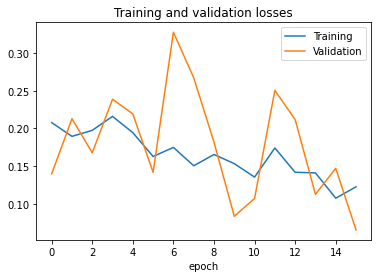

In [ ]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

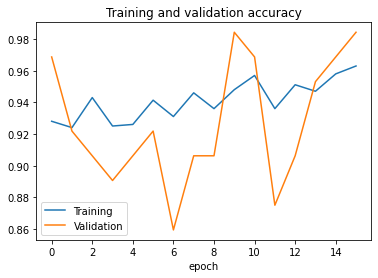

In [ ]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [ ]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

16/16 [==============================] - 10s 616ms/step - loss: 0.2365 - accuracy: 0.8926
Test Set Loss :  0.2364749163389206
Test Set Accuracy :  0.8925619721412659


In [ ]:
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for filename in uploaded.keys():
#   img_path = '/content/' + filename
#   img = image.load_img(img_path, target_size = (150,150))
#   images = image.img_to_array(img)
#   images = np.expand_dims(images, axis = 0)
#   prediction = model.predict(images)

#   if prediction == 0:
#     print("The report is COVID-19 Positive")
#   else:
#     print("The report is COVID-19 Negative")

In [ ]:
# model.save("model.h5")

In [ ]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_163 (Conv2D)         (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d_147 (MaxPooli  (None, 128, 128, 32)     0         
 ng2D)                                                           
                                                                 
 dropout_179 (Dropout)       (None, 128, 128, 32)      0         
                                                                 
 conv2d_164 (Conv2D)         (None, 128, 128, 64)      51264     
                                                                 
 max_pooling2d_148 (MaxPooli  (None, 64, 64, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_180 (Dropout)       (None, 64, 64, 64)      

In [ ]:
model.layers[4]


In [ ]:
def get_img_array(img_path, size=(256,256)):
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 NumPy array
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 180, 180, 3)
    array = np.expand_dims(array, axis=0) / 255.0
    return array

In [ ]:
def make_gradcam_heatmap(img_array, model):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.layers[4]
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Mark the classifying layers
    classifier_layers = model.layers[-5:]

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for classifier_layer in classifier_layers:
        x = classifier_layer(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]
    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

In [ ]:
def superimposed_cam(file_path):
    # Prepare image
    img_array = get_img_array(file_path)

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(
        img_array, model
    )

    # Rescale the original image
    img = img_array * 255

    # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # We create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.4 + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img[0])

    return superimposed_img, CLASSES[np.argmax(model.predict(img_array))]

In [ ]:
import tensorflow as tf
from tensorflow import keras

covid_filenames = tf.io.gfile.glob('/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/*')
normal_filenames = tf.io.gfile.glob('/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/*')

1/1 [==============================] - 0s 15ms/step


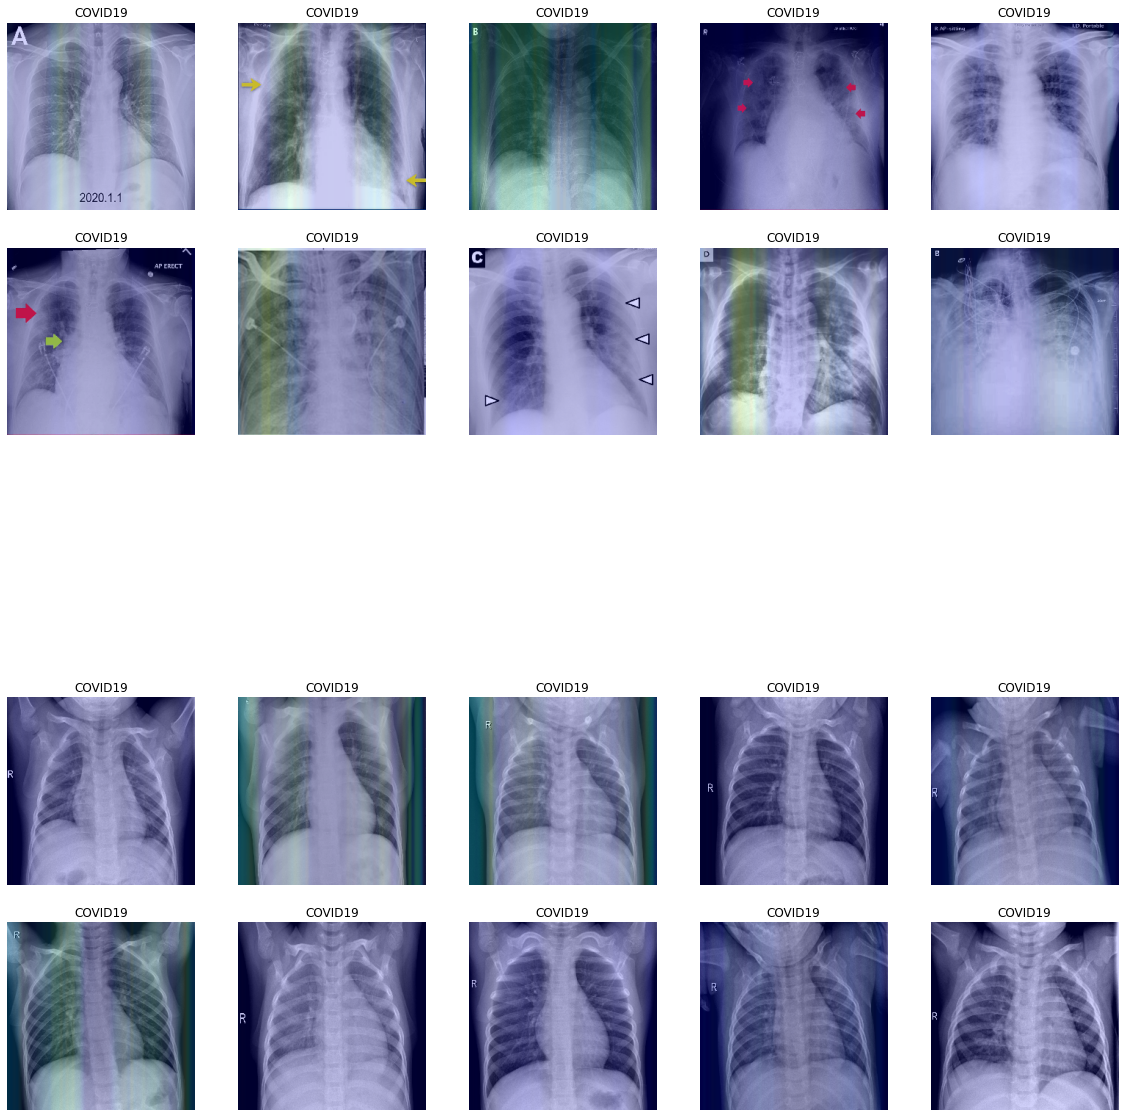

In [ ]:
plt.figure(figsize=(20,20))
for n in range(10):
    ax = plt.subplot(5,5,n+1)
    img, pred = superimposed_cam(covid_filenames[n])
    plt.imshow(img)
    plt.title(pred)
    plt.axis("off")
for n in range(15, 25):
    ax = plt.subplot(5,5,n+1)
    img, pred = superimposed_cam(normal_filenames[n])
    plt.imshow(img)
    plt.title(pred)
    plt.axis("off")